In [18]:
"""
First Order Estimation - Tclab

@author: Jeferson Gallego Chaverra
        Pedro Alejandro Sanchez Osorio
        Victor Alfonso Echeverri Moyano
"""
import numpy as np
import matplotlib.pyplot as plt
import control
from scipy.interpolate import *
from sklearn.metrics import *

def validar_Dato(frase):

    while True:
            valor= input(frase)     
            if valor.isnumeric():
                valor = int(valor)
                break
            else:
                print('El dato ingresado no es numerico , por favor ingresar un dato numerico')

    return valor

def limites(frase,minimo,maximo):    
    flag=True
    while flag:
        y=validar_Dato(frase)
        if y<=maximo and y>=minimo:
            flag=False
        else:
            print(f'El dato ingresado esta por fuera de los limites establecidos min {minimo} y max {maximo}')

    return y

def crammer_2(mat,vec):
    d = np.linalg.det(mat)
    
    mat1= np.array([vec,mat[:,1]])
    mat2= np.array([mat[:,0],vec])
    
    d1 = np.linalg.det(mat1)
    d2 = np.linalg.det(mat2)
    
    x1 =d1/d
    x2 =d2/d
    return(x1,x2)


## First Order Estimation

## Upload Data

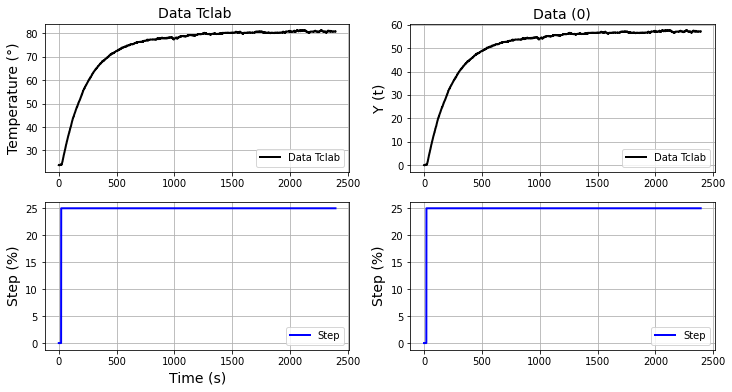

23.72


In [19]:
# Upload Data 
x =limites('DATA 1 OR 2 ?',1,2)

# Data
if x==1:
     data = np.loadtxt('25.txt',delimiter=',',skiprows=1)
elif x == 2:
     data = np.loadtxt('40.txt',delimiter=',',skiprows=1)


# Tclab Data
t1 = data[:,0].T 
u1 = data[:,1].T
y1 = data[:,2].T

# Y ---> Zero
Y_Zero = y1[0]
y2=y1-Y_Zero

# Z
Ze=20
Z = y1[Ze]

# Plot
plt.figure(figsize=(12,6))
 
# Subplot Data
ax=plt.subplot(2,2,1)
ax.grid()
plt.title("Data Tclab ",fontsize = 14)
plt.plot(t1, y1, 'k', linewidth=2, label='Data Tclab')
plt.ylabel('Temperature (°)', fontsize = 14)
plt.legend(loc='best')

ax=plt.subplot(2,2,2)
ax.grid()
plt.title("Data (0)",fontsize = 14)
plt.plot(t1, y2, 'k', linewidth=2, label='Data Tclab')
plt.ylabel('Y (t)', fontsize = 14)
plt.legend(loc='best')

# Subplot Step          
ax=plt.subplot(2,2,3)
ax.grid()
plt.plot(t1, u1, 'b-', linewidth=2, label='Step')
plt.ylabel('Step (%)', fontsize = 14)
plt.xlabel('Time (s)', fontsize = 14)
plt.legend(loc='best')

ax=plt.subplot(2,2,4)
ax.grid()
plt.plot(t1, u1, 'b-', linewidth=2, label='Step')
plt.ylabel('Step (%)', fontsize = 14)
plt.legend(loc='best')
plt.show()
print(Y_Zero)



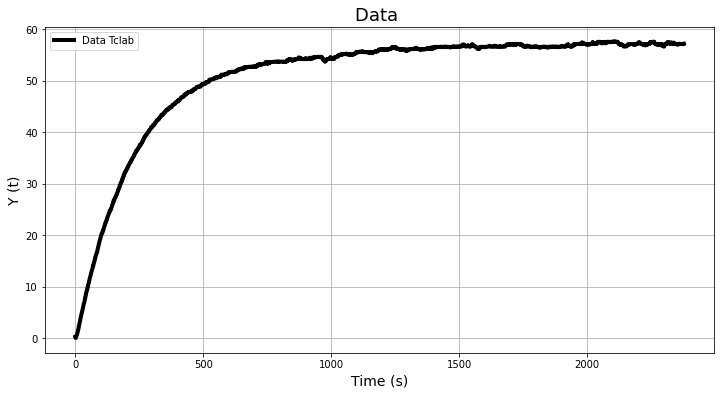

In [20]:
# Zero Step Time = 20 Seg
Zero = 20

# Simulation Time 
t0 = data[Zero:,0].T 
tf = len(t0) - 1
dt = 1
t = np.linspace(0,tf,int(tf/dt)+1)

# Vector Y (t)
y = y2[Zero:]

# Iterations
N=len(y)
       
plt.figure(figsize=(12,6))
plt.title("Data ",fontsize = 18)
plt.plot(t, y, 'k', linewidth=4, label='Data Tclab')
plt.ylabel('Y (t)', fontsize = 14)
plt.xlabel('Time (s)', fontsize = 14)
plt.legend(loc='best')
plt.grid()


**1:** 

Time of 60% Final Value = $\tau$

$t_s = 4\tau$

In [21]:
yf = 0
i1 = 0
i2 = 0

# T1
t_1 = np.array([])
y_1 = np.array([])
# T2
t_2 = np.array([])
y_2 = np.array([])

# Final Value
V = y[-1]

# T1 = 28.3% Final Value(Real)
V1 = 0.283*V
# T2 = 63.2% Final Value(Real)
V2 = 0.632*V

# T1
for k in range(N):
    if(y[k]>=V1):
        t_1 = np.append(t_1,t[k-1])
        t_1 = np.append(t_1,t[k])
        y_1 = np.append(y_1,y[k-1])
        y_1 = np.append(y_1,y[k])
        break

y_interp_1 = interp1d(y_1, t_1)
T1 = y_interp_1(V1)
print(y_1,V1,t_1,T1)

# T2
for k in range(N):
    if(y[k]>=V2):
        t_2 = np.append(t_2,t[k-1])
        t_2 = np.append(t_2,t[k])
        y_2 = np.append(y_2,y[k-1])
        y_2 = np.append(y_2,y[k])
        break

y_interp_2 = interp1d(y_2, t_2)
T2 = y_interp_2(V2)
print(y_2,V2,t_2,T2)


# Determinante Tau y Theta 
matrix= np.array([[1,(1/3)],
                   [1,1]])

vector= np.array([T1,T2])

theta,tau = crammer_2(matrix,vector)

ts = 4*tau

# Final U
if x==1:
    uf= 25
elif x == 2:
    uf = 40

# K 
Kf = (V)/(uf)

print(f" K: {Kf:.4f} - Tau: {tau:.4f} - Theta: {theta:.4f} - tss: {ts:.4f}")


[16.08 16.35] 16.16496 [81. 82.] 81.31466666666667
[36.03 36.1 ] 36.09984 [235. 236.] 235.99771428571427
 K: 2.2848 - Tau: 232.0246 - Theta: 3.9731 - tss: 928.0983


Ge =     
  2.285
---------
232 s + 1

e^  - 3.9731
Mean Squared Error   =  0.8834
MAX Error            =  2.6090
Absolute Error       =  0.7684
Mean Absolute Error  =  0.5932


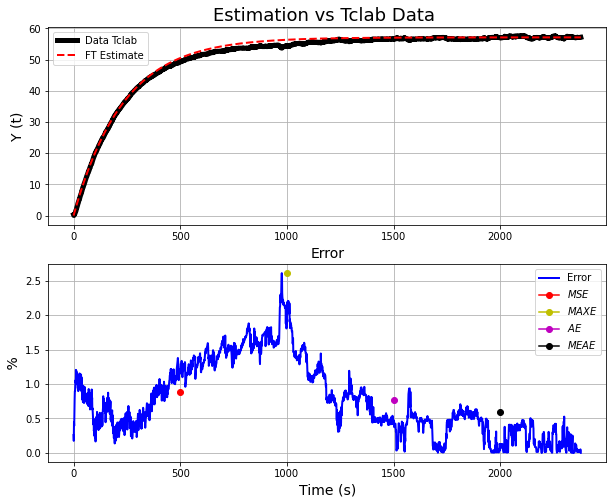

In [22]:
# Approximate Transfer Function:
Ge = control.tf([Kf],[tau,1])

# Step Response 
_,ye = control.step_response(Ge,t)

# Final Ye
if x==1:
     ye = ye * 25
elif x == 2:
     ye = ye * 40

# Error
e = np.abs(y - ye)

# Evaluation Criteria 
MSE = mean_squared_error(y[0:len(ye)], ye[0:len(ye)])
MAXE = max_error(y[0:len(ye)], ye[0:len(ye)])
MAE = mean_absolute_error(y[0:len(ye)], ye[0:len(ye)])
MEAE = median_absolute_error(y[0:len(ye)], ye[0:len(ye)])

print(f"Ge =     {Ge}") 
print(f"e^  - {theta:.4f}")
print(f"Mean Squared Error   =  {MSE:.4f}")
print(f"MAX Error            =  {MAXE:.4f}")
print(f"Absolute Error       =  {MAE:.4f}")
print(f"Mean Absolute Error  =  {MEAE:.4f}")


# Plot
plt.figure(figsize=(10,8))

ax=plt.subplot(2,1,1)
ax.grid()
plt.title("Estimation vs Tclab Data ",fontsize = 18)
plt.plot(t,y, 'k', linewidth=5, label='Data Tclab')
plt.plot(t,ye, 'r--'  , linewidth=2, label='FT Estimate')
plt.ylabel('Y (t)', fontsize = 14)
plt.legend(loc='best')

ax=plt.subplot(2,1,2)
ax.grid()
plt.title("Error",fontsize = 14)
plt.plot(t,e,  'b-'  , linewidth=2, label='Error')
plt.plot(500,MSE, marker="o", color="r",label=r'$MSE$')
plt.plot(1000,MAXE, marker="o", color="y",label=r'$MAXE$')
plt.plot(1500,MAE, marker="o", color="m",label=r'$AE$')
plt.plot(2000,MEAE, marker="o", color="k",label=r'$MEAE$')
plt.xlabel('Time (s)', fontsize = 14)
plt.ylabel(' % ', fontsize = 14)
plt.legend(loc='best')